In [1]:
from google.colab import drive #import drive from google.colab
drive.mount('/content/drive') #mount google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
no2_data = pd.read_csv('/content/drive/MyDrive/final project/nitrous-oxide-emissions.csv') #Reading data from google drive into a pandas dataframe
print(no2_data.head())
no2_data.describe()

        Entity Code  Year  Annual nitrous oxide emissions in CO₂ equivalents
0  Afghanistan  AFG  1850                                          223008.40
1  Afghanistan  AFG  1851                                          227659.61
2  Afghanistan  AFG  1852                                          232190.92
3  Afghanistan  AFG  1853                                          236528.19
4  Afghanistan  AFG  1854                                          240597.22


,Year,Annual nitrous oxide emissions in CO₂ equivalents
count,38060.00000,3.806000e+04
mean,1936.00000,2.505370e+07
std,49.94062,1.279464e+08
min,1850.00000,0.000000e+00
25%,1893.00000,6.872257e+04
50%,1936.00000,6.837655e+05
75%,1979.00000,4.982349e+06
max,2022.00000,2.969828e+09


In [4]:
no2_data = no2_data.rename(columns = {'Annual nitrous oxide emissions in CO₂ equivalents' : 'Emission'})

In [5]:
print(no2_data[no2_data['Code'].isna()])
no2_data = no2_data.dropna(subset=['Code'])
no2_data = no2_data.reset_index(drop=True)

                              Entity Code  Year      Emission
173                           Africa  NaN  1850  1.031525e+07
174                           Africa  NaN  1851  1.051801e+07
175                           Africa  NaN  1852  1.071583e+07
176                           Africa  NaN  1853  1.090568e+07
177                           Africa  NaN  1854  1.108448e+07
...                              ...  ...   ...           ...
36498  Upper-middle-income countries  NaN  2018  1.167318e+09
36499  Upper-middle-income countries  NaN  2019  1.151175e+09
36500  Upper-middle-income countries  NaN  2020  1.184868e+09
36501  Upper-middle-income countries  NaN  2021  1.210988e+09
36502  Upper-middle-income countries  NaN  2022  1.215756e+09

[3114 rows x 4 columns]


In [6]:
print(no2_data)

            Entity Code  Year    Emission
0      Afghanistan  AFG  1850   223008.40
1      Afghanistan  AFG  1851   227659.61
2      Afghanistan  AFG  1852   232190.92
3      Afghanistan  AFG  1853   236528.19
4      Afghanistan  AFG  1854   240597.22
...            ...  ...   ...         ...
34941     Zimbabwe  ZWE  2018  5237749.00
34942     Zimbabwe  ZWE  2019  5149571.50
34943     Zimbabwe  ZWE  2020  4687377.50
34944     Zimbabwe  ZWE  2021  4966384.00
34945     Zimbabwe  ZWE  2022  4960561.00

[34946 rows x 4 columns]


In [7]:
no2_pivot = pd.pivot_table(no2_data, index='Year', columns='Entity', values = 'Emission')
print(no2_pivot)

Entity  Afghanistan      Albania      Algeria     Andorra       Angola  \
Year                                                                     
1850      223008.40    43200.230    89805.220   1066.9111    470101.80   
1851      227659.61    43941.914    91520.250   1084.1968    479868.28   
1852      232190.92    44668.260    93194.836   1101.1549    489383.90   
1853      236528.19    45369.790    94803.940   1117.5826    498493.53   
1854      240597.22    46037.004    96322.520   1133.2773    507041.94   
...             ...          ...          ...         ...          ...   
2018     4796810.00  1038251.200  8151232.500  40999.5200  15677489.00   
2019     4583394.50  1059280.400  8241126.500  41384.7800  17541938.00   
2020     4508788.00   970890.300  7947529.000  38591.8480  16789176.00   
2021     4355247.50   765368.250  7999492.000  39559.8630  16971868.00   
2022     4335478.50   751233.600  8041803.000  36336.9300  17129862.00   

Entity  Anguilla  Antigua and Barbuda

In [8]:
print(no2_pivot['Afghanistan'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):print(no2_pivot.isna().sum())


Year
1850     223008.40
1851     227659.61
1852     232190.92
1853     236528.19
1854     240597.22
           ...    
2018    4796810.00
2019    4583394.50
2020    4508788.00
2021    4355247.50
2022    4335478.50
Name: Afghanistan, Length: 173, dtype: float64
Entity
Afghanistan                         0
Albania                             0
Algeria                             0
Andorra                             0
Angola                              0
Anguilla                            0
Antigua and Barbuda                 0
Argentina                           0
Armenia                             0
Aruba                               0
Australia                           0
Austria                             0
Azerbaijan                          0
Bahamas                             0
Bahrain                             0
Bangladesh                          0
Barbados                            0
Belarus                             0
Belgium                             0
Belize    

In [9]:
drop_col = []
for col in no2_pivot.columns:
  if (no2_pivot[col]==0).all():
    drop_col.append(col)
print(drop_col)
no2_pivot = no2_pivot.drop(columns=drop_col)

['Anguilla', 'British Virgin Islands', 'Marshall Islands', 'Saint Helena']


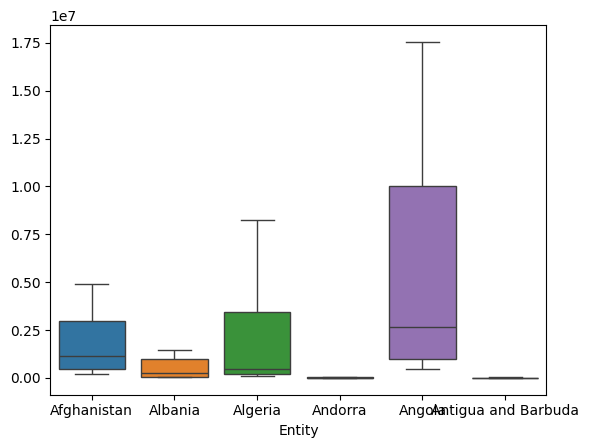

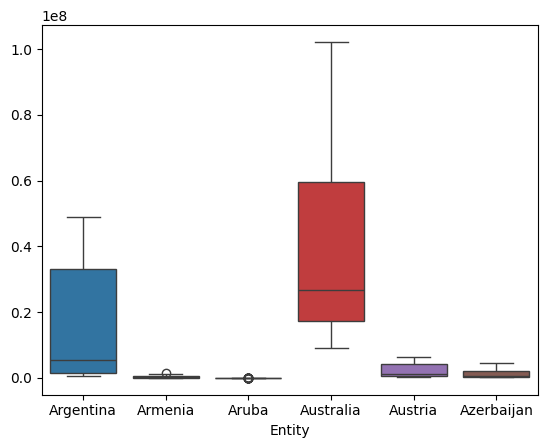

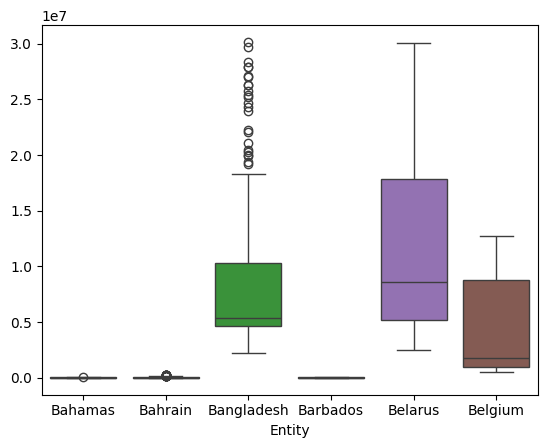

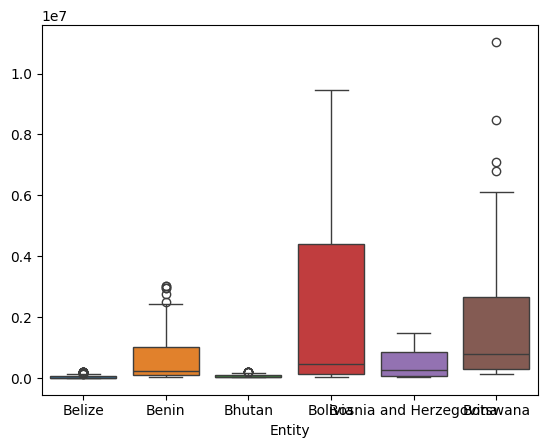

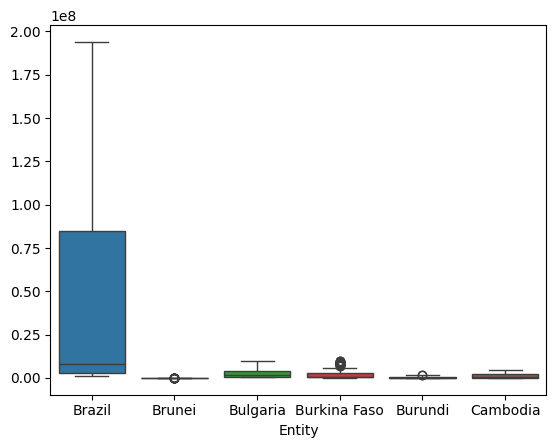

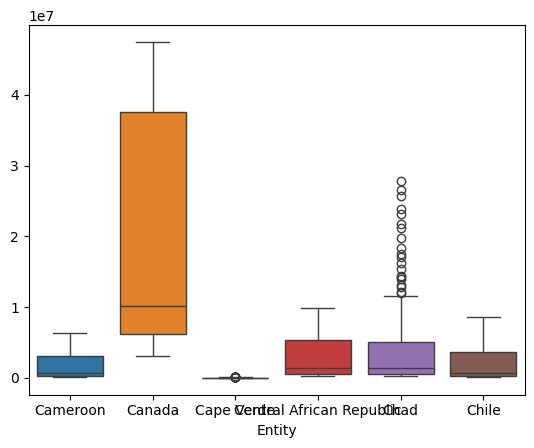

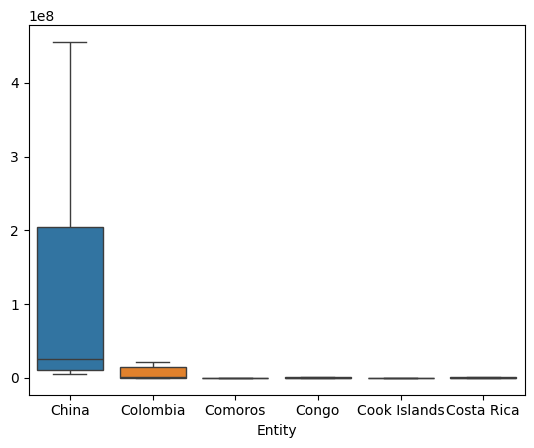

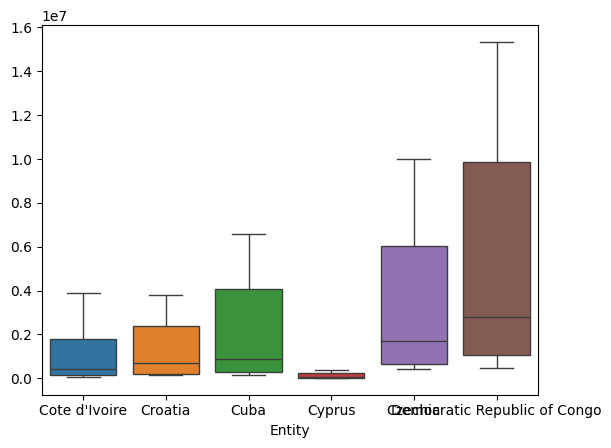

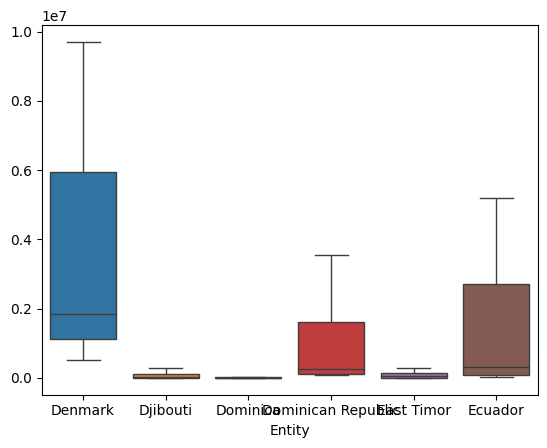

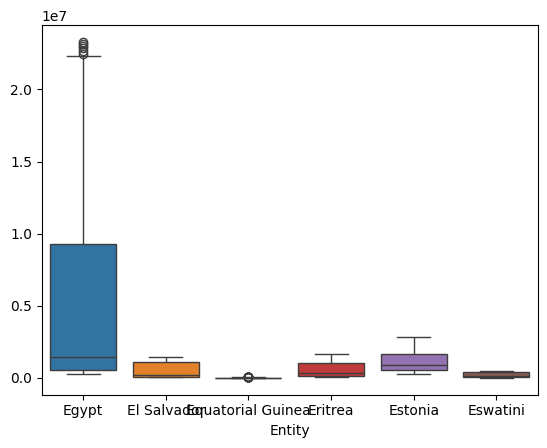

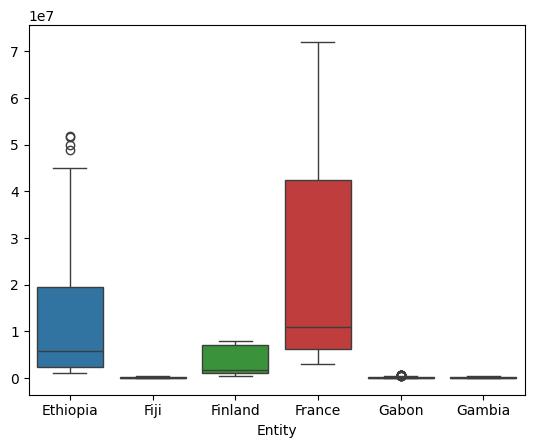

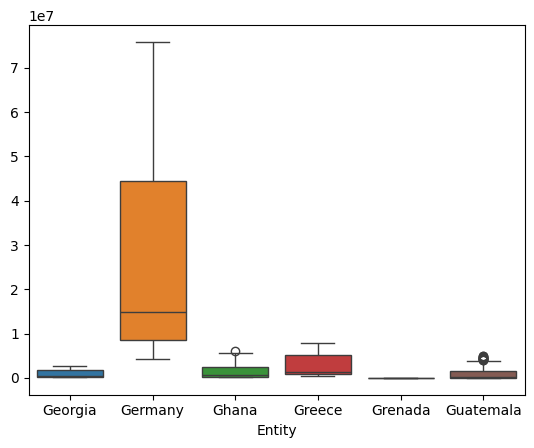

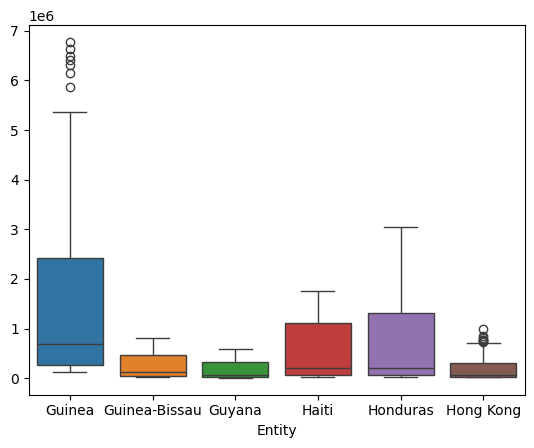

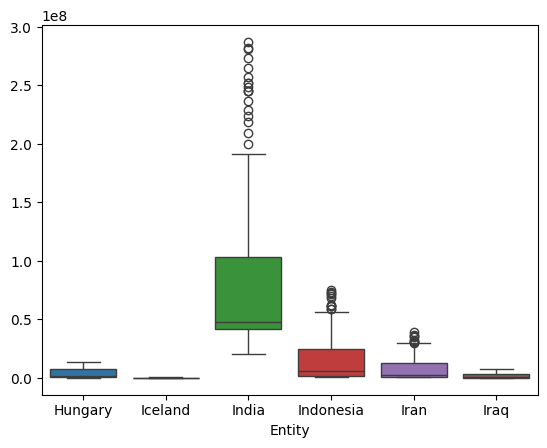

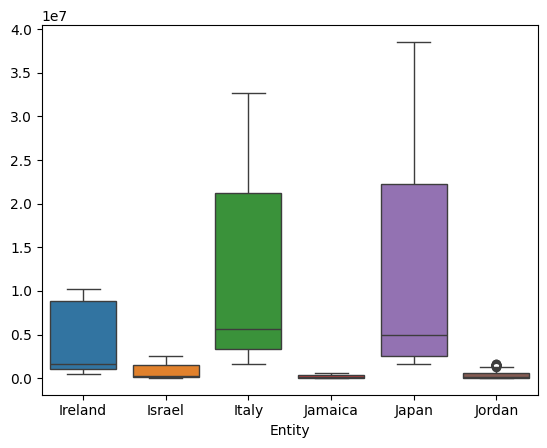

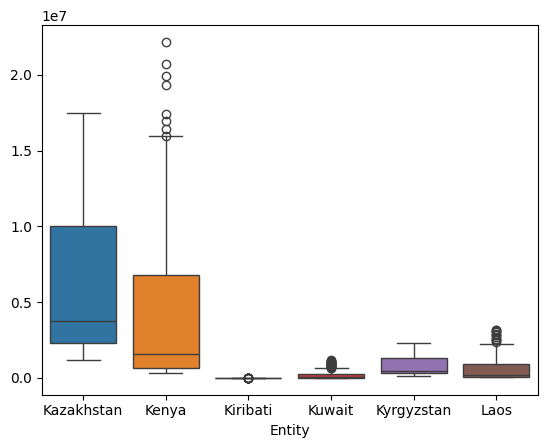

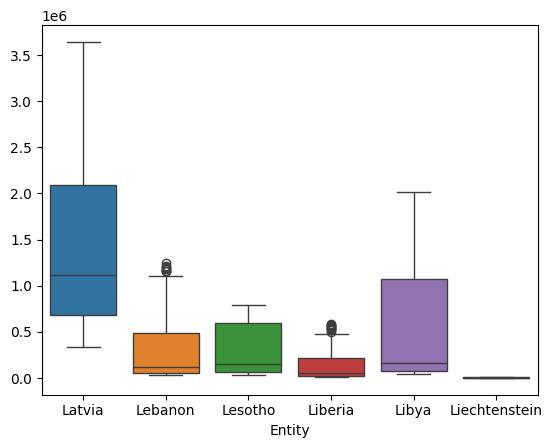

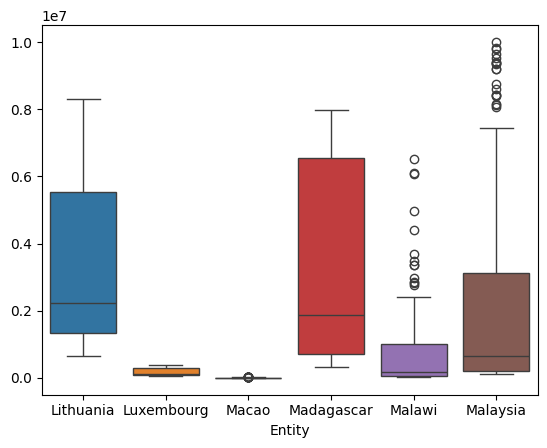

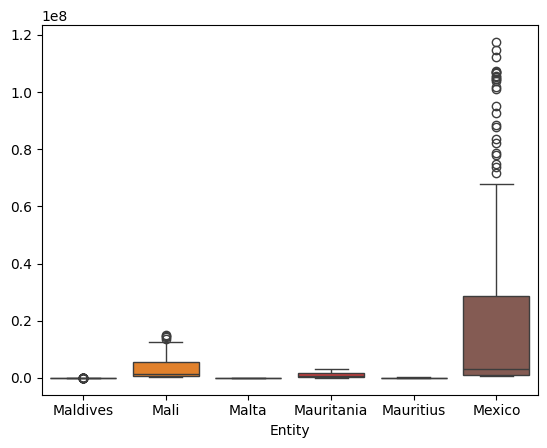

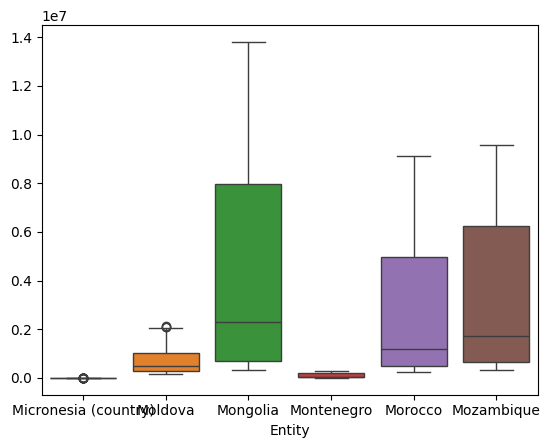

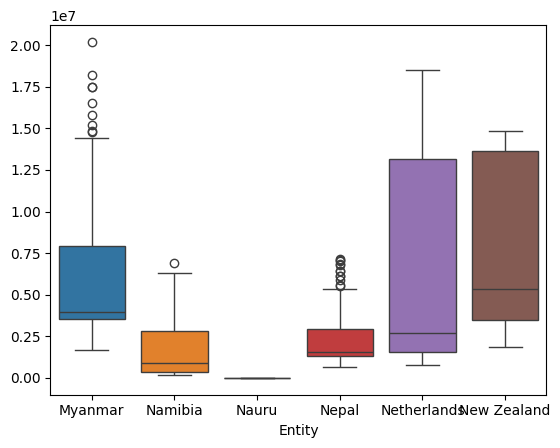

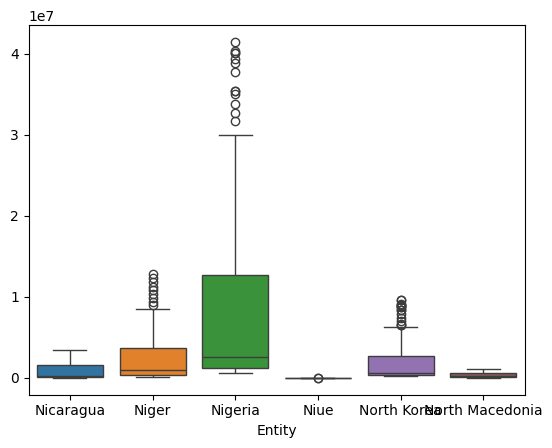

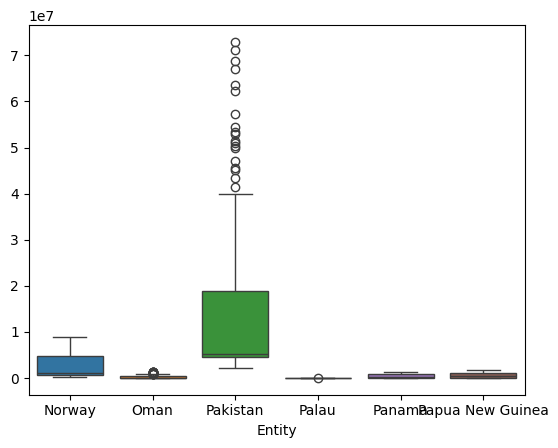

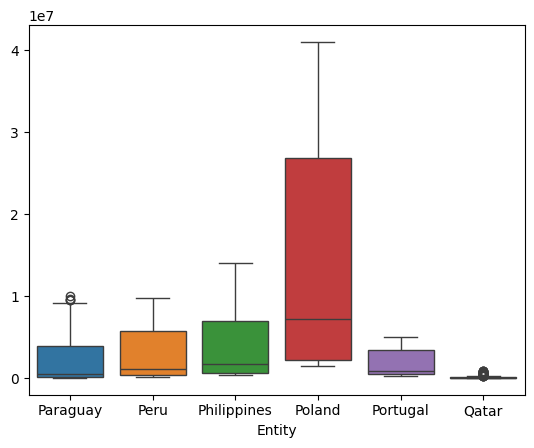

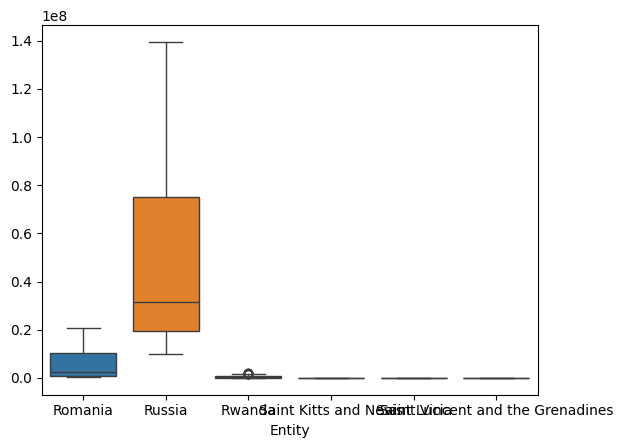

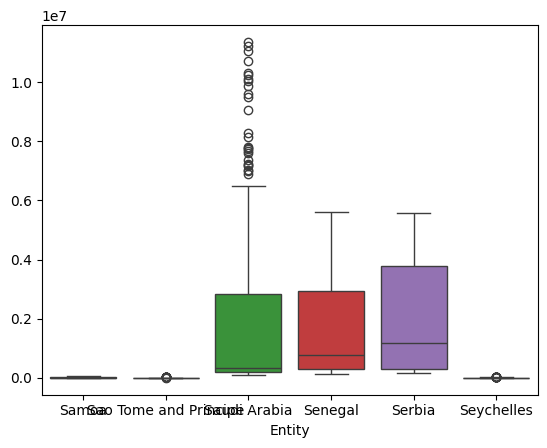

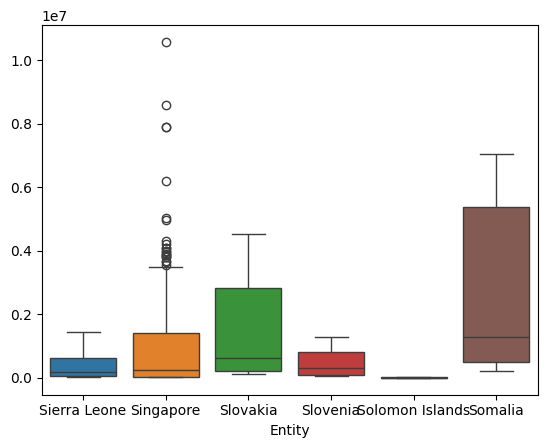

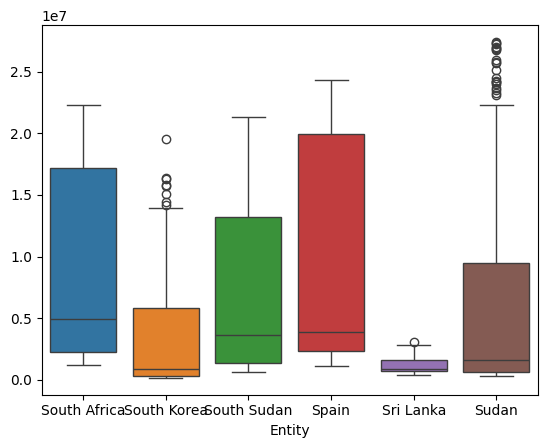

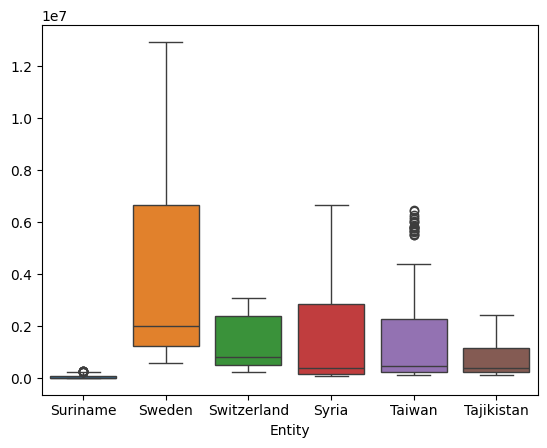

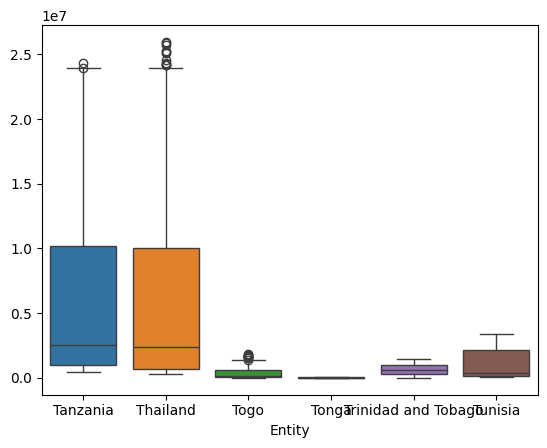

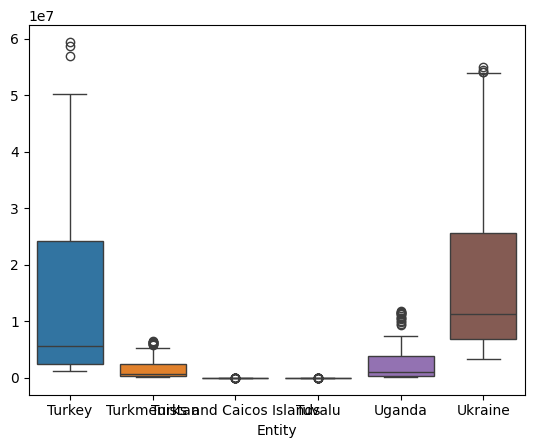

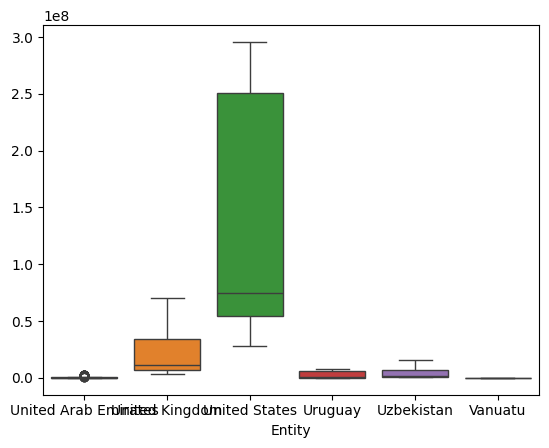

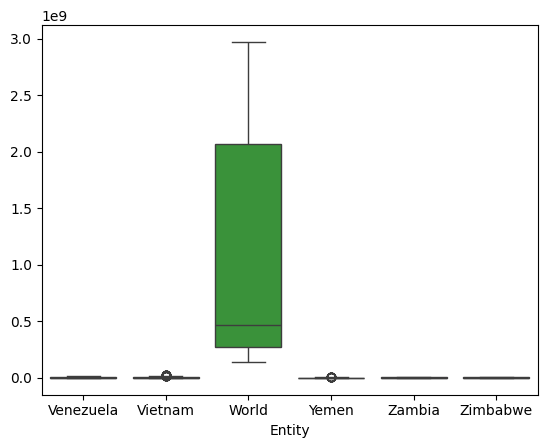

In [10]:
j=6
for i in range (0, len(no2_pivot.columns), 6):
  plt.figure()
  sns.boxplot(data = no2_pivot.iloc[:,i:j])
  plt.show()
  j=j+6

In [11]:
outliers = []
for col in no2_pivot.columns:
  Q1 = np.percentile(no2_pivot[col], 25, interpolation = 'midpoint')
  Q3 = np.percentile(no2_pivot[col], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  lower = Q1 - (1.5 * IQR)
  upper = Q3 + (1.5 * IQR)
  if no2_pivot[(no2_pivot[col] < lower) | (no2_pivot[col] > upper)].any(axis=None):
    outliers.append(col)
print(outliers)

['Armenia', 'Aruba', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Botswana', 'Brunei', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Chad', 'Egypt', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Jordan', 'Kenya', 'Kiribati', 'Kuwait', 'Laos', 'Lebanon', 'Liberia', 'Macao', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Mexico', 'Micronesia (country)', 'Moldova', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Niue', 'North Korea', 'Oman', 'Pakistan', 'Palau', 'Paraguay', 'Qatar', 'Rwanda', 'Sao Tome and Principe', 'Saudi Arabia', 'Seychelles', 'Singapore', 'South Korea', 'Sri Lanka', 'Sudan', 'Suriname', 'Taiwan', 'Tanzania', 'Thailand', 'Togo', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'Vietnam', 'Yemen']


In [12]:
for col in outliers:
  Q1 = np.percentile(no2_pivot[col], 25, interpolation = 'midpoint')
  Q3 = np.percentile(no2_pivot[col], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  lower = Q1 - (1.5 * IQR)
  upper = Q3 + (1.5 * IQR)
  no2_pivot[col] = np.where(no2_pivot[col] < lower, lower, no2_pivot[col])
  no2_pivot[col] = np.where(no2_pivot[col] > upper, upper, no2_pivot[col])


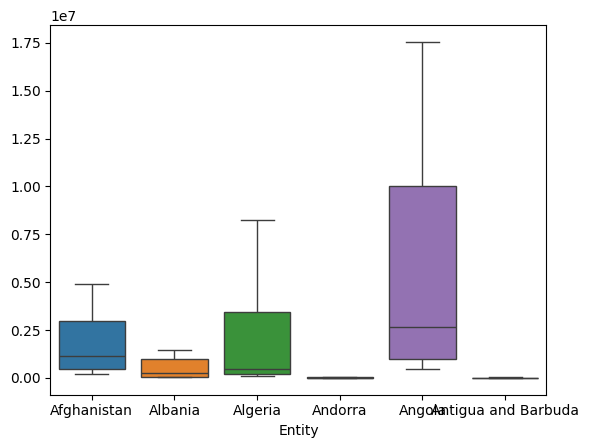

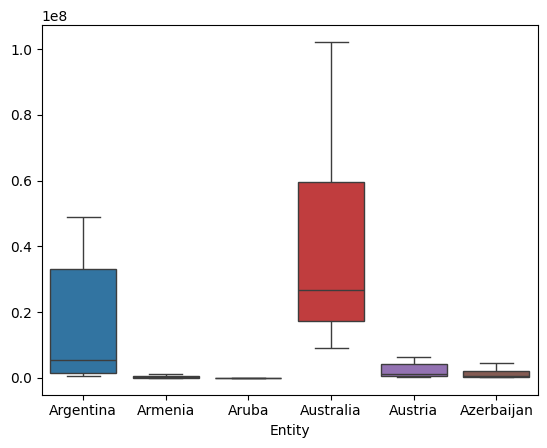

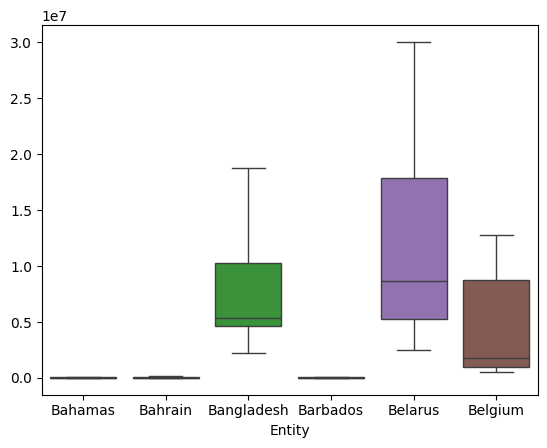

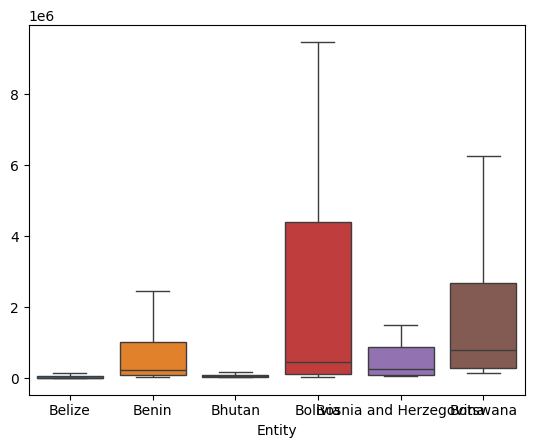

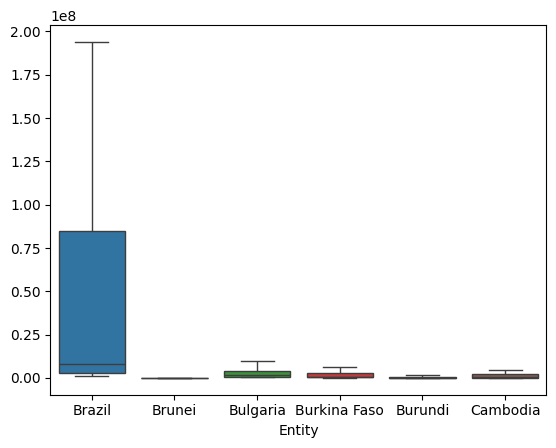

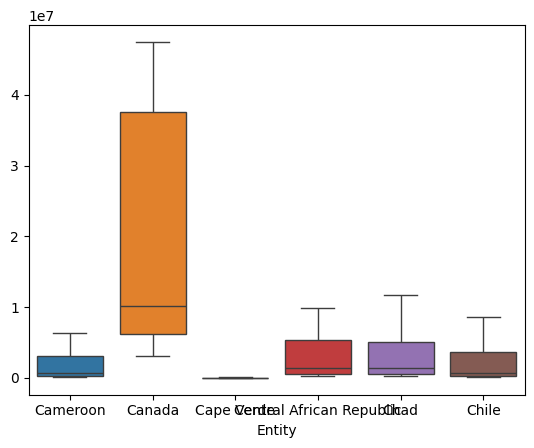

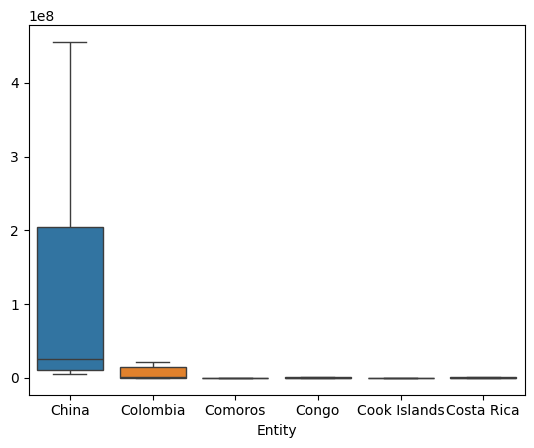

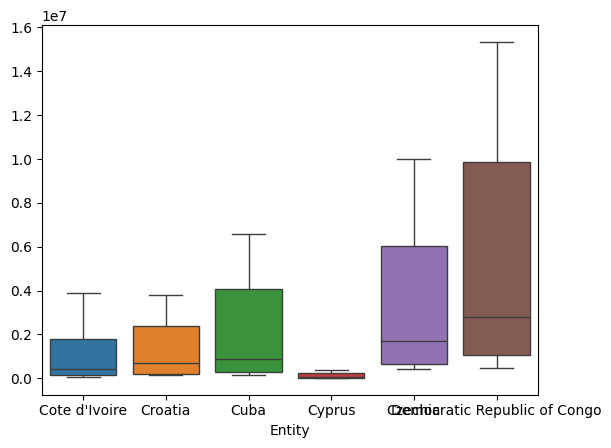

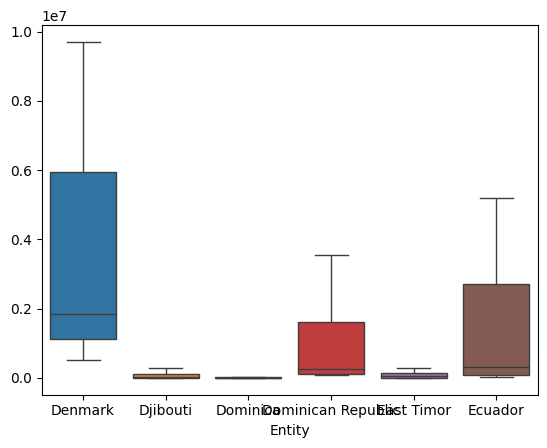

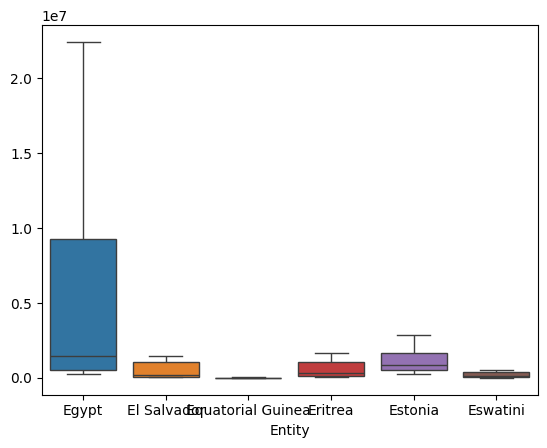

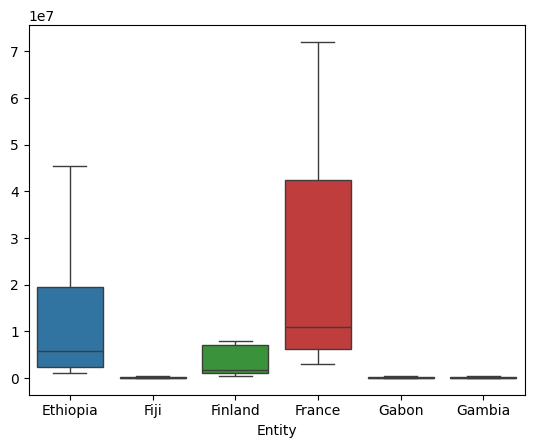

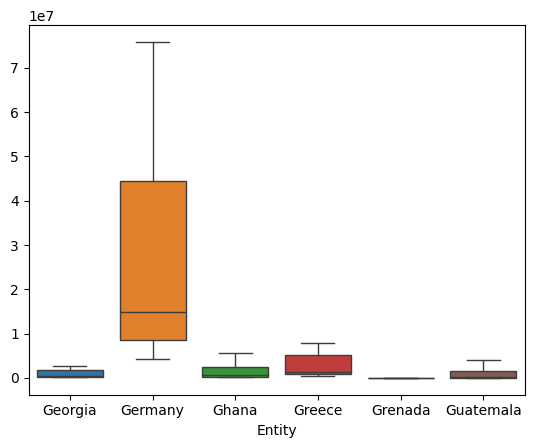

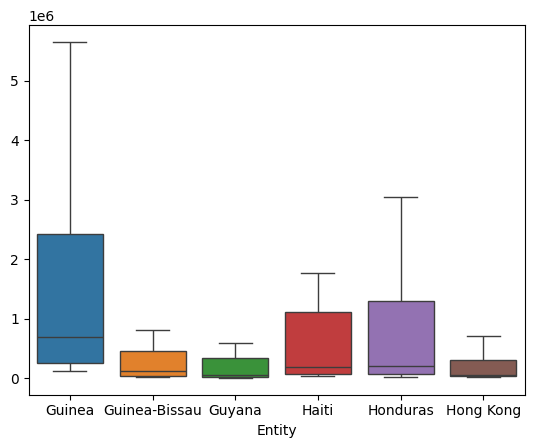

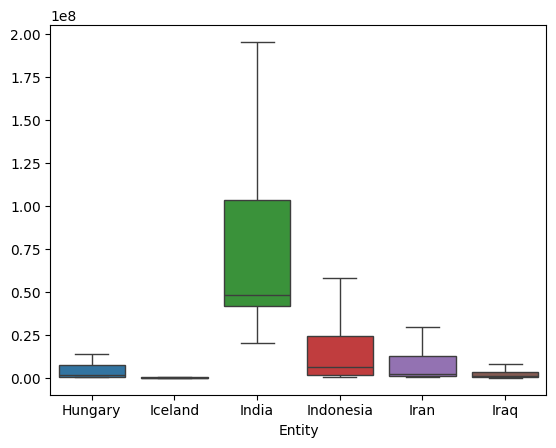

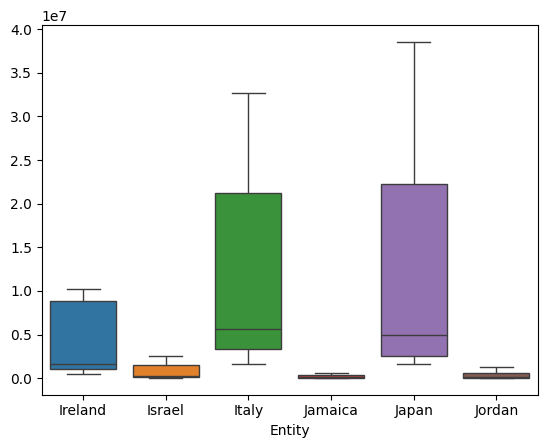

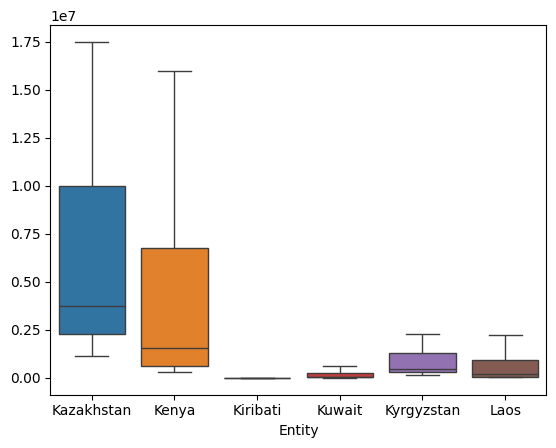

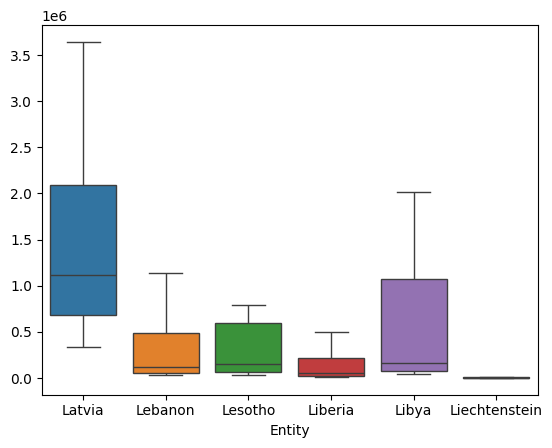

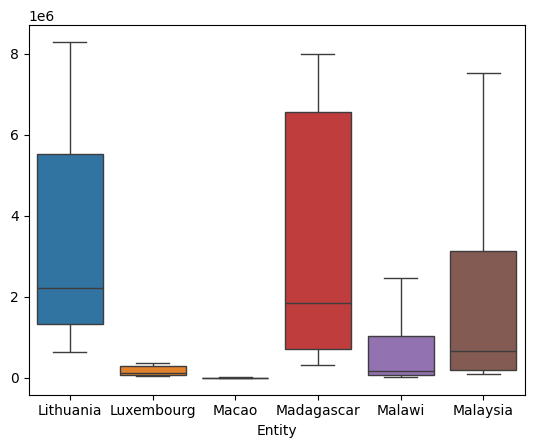

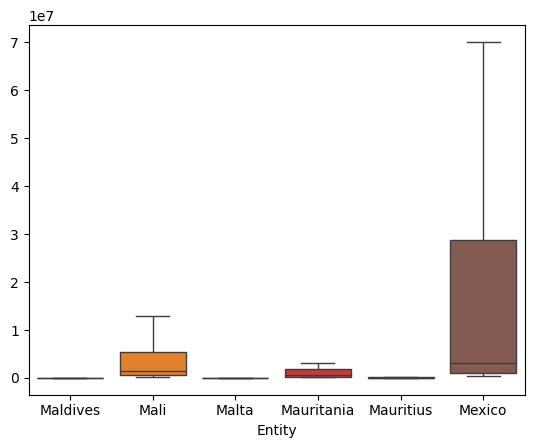

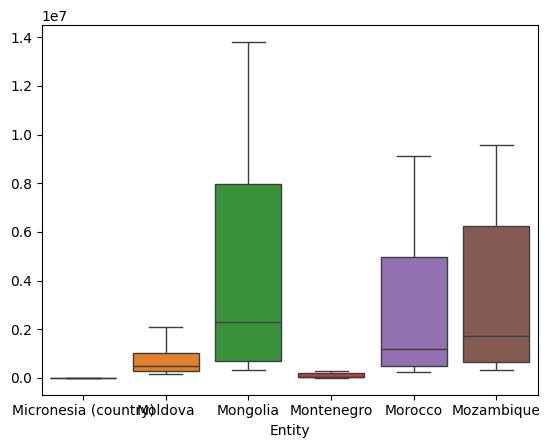

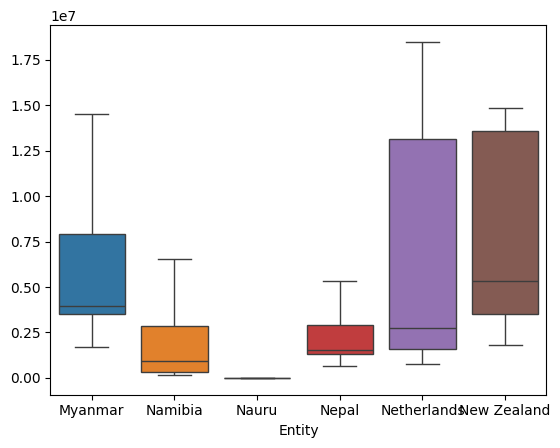

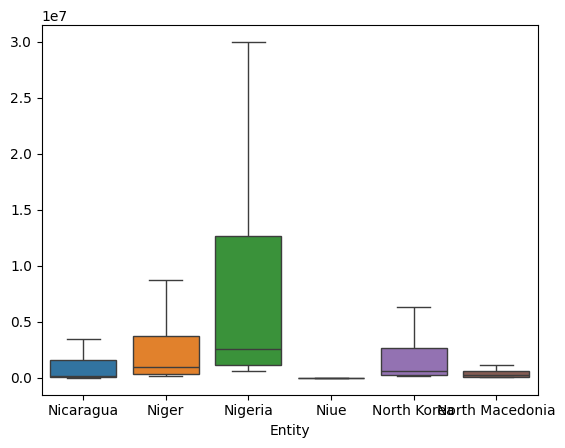

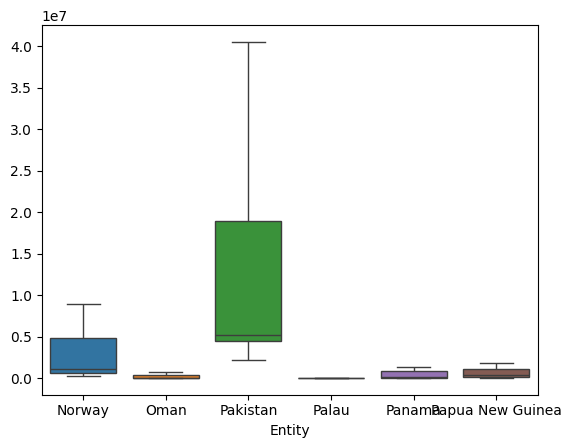

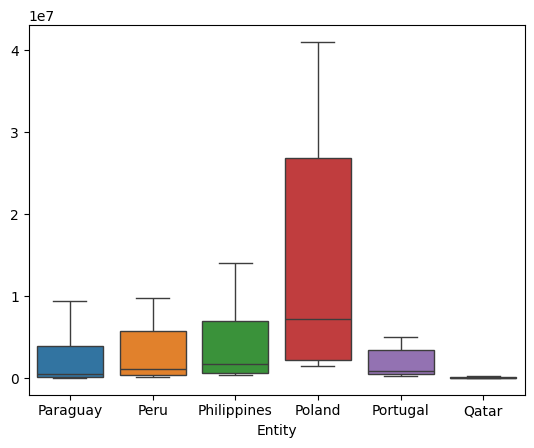

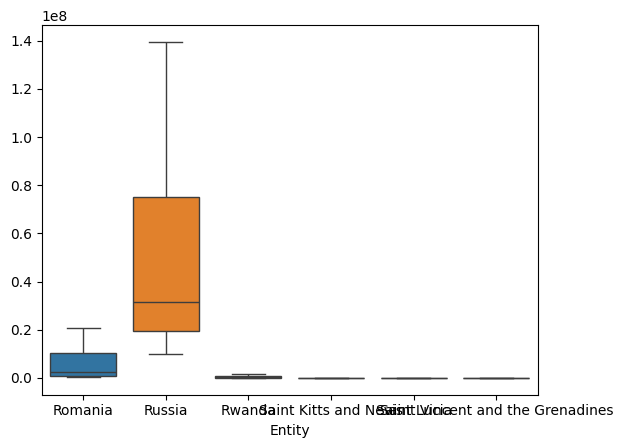

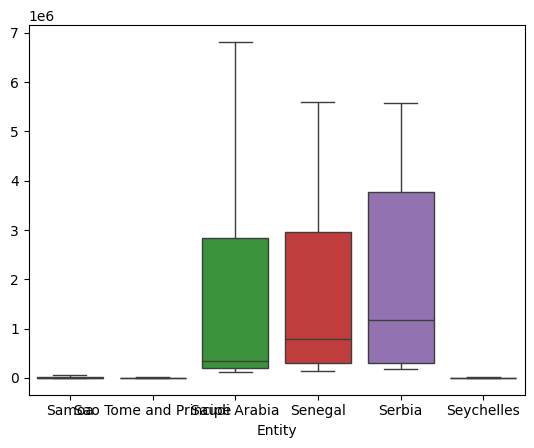

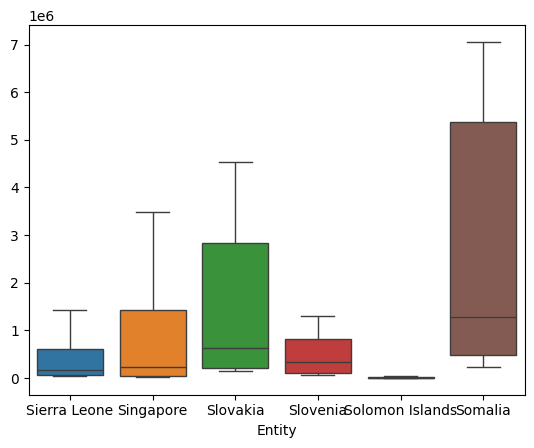

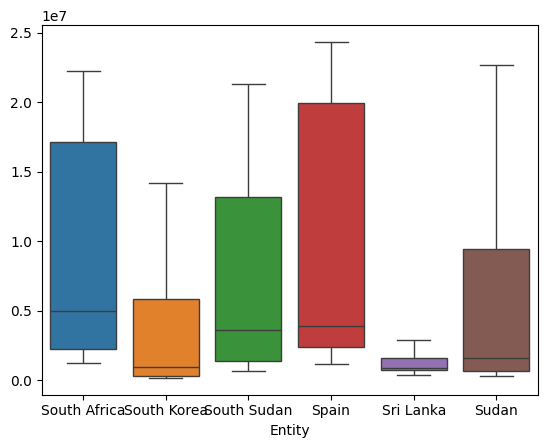

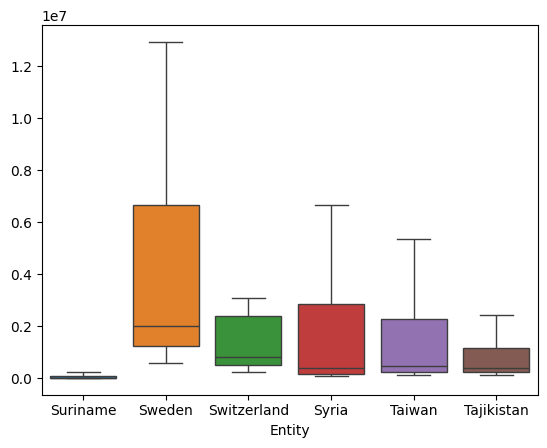

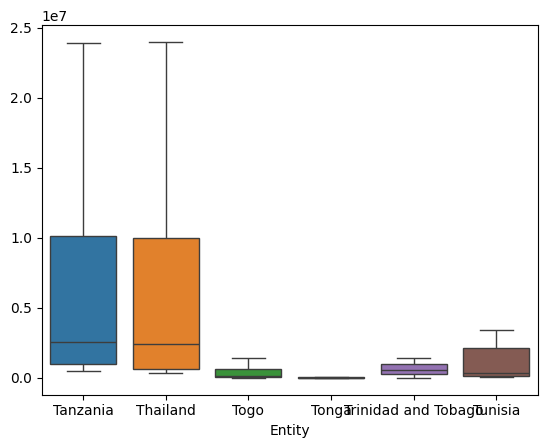

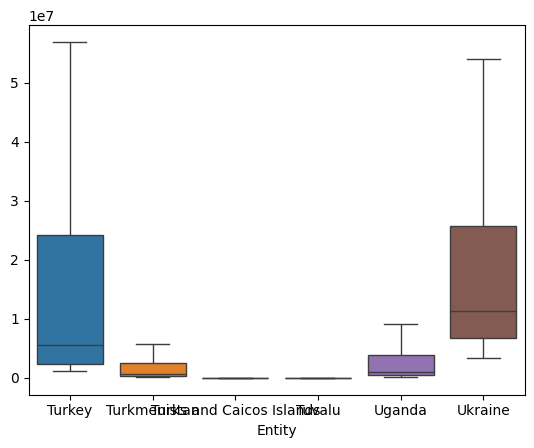

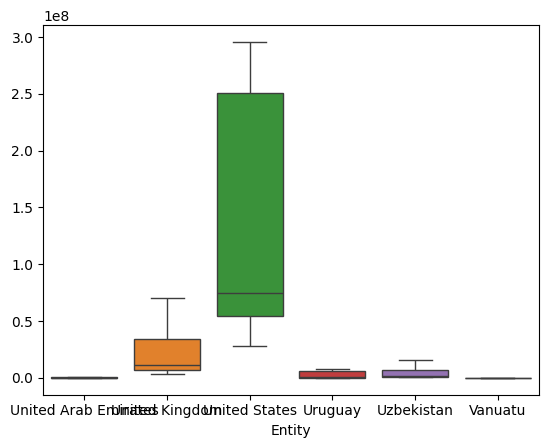

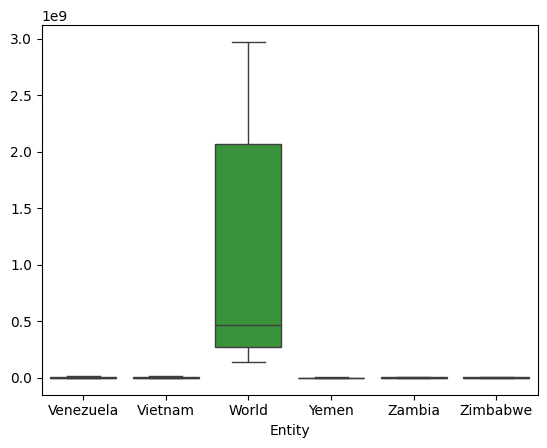

In [13]:
j=6
for i in range (0, len(no2_pivot.columns), 6):
  plt.figure()
  sns.boxplot(data = no2_pivot.iloc[:,i:j])
  plt.show()
  j=j+6

In [14]:

no2_pivot = no2_pivot.reset_index()


In [15]:
no2_processed = pd.melt(no2_pivot, id_vars = ['Year'], var_name='Country', value_name = 'Emission')
print(no2_processed)


       Year      Country    Emission
0      1850  Afghanistan   223008.40
1      1851  Afghanistan   227659.61
2      1852  Afghanistan   232190.92
3      1853  Afghanistan   236528.19
4      1854  Afghanistan   240597.22
...     ...          ...         ...
34249  2018     Zimbabwe  5237749.00
34250  2019     Zimbabwe  5149571.50
34251  2020     Zimbabwe  4687377.50
34252  2021     Zimbabwe  4966384.00
34253  2022     Zimbabwe  4960561.00

[34254 rows x 3 columns]


In [16]:
no2_processed_excel = no2_processed.to_excel('/content/drive/MyDrive/final project/no2_processed.xlsx')

In [17]:
fertilizer_data = pd.read_csv('/content/drive/MyDrive/final project/nitrogen-fertilizer-application-per-hectare-of-cropland.csv')

In [18]:
print(fertilizer_data.head())

        Entity Code  Year  \
0  Afghanistan  AFG  1961   
1  Afghanistan  AFG  1962   
2  Afghanistan  AFG  1963   
3  Afghanistan  AFG  1964   
4  Afghanistan  AFG  1965   

   Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare  
0                                               0.13                                                     
1                                               0.13                                                     
2                                               0.13                                                     
3                                               0.13                                                     
4                                               0.13                                                     


In [19]:
fertilizer_data = fertilizer_data.rename(columns = {'Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare' : 'Consumption'})

In [20]:
print(fertilizer_data[fertilizer_data['Code'].isna()])
fertilizer_data = fertilizer_data.dropna(subset=['Code'])
fertilizer_data = fertilizer_data.reset_index(drop=True)

                     Entity Code  Year  Consumption
59             Africa (FAO)  NaN  1961         2.07
60             Africa (FAO)  NaN  1962         2.21
61             Africa (FAO)  NaN  1963         2.55
62             Africa (FAO)  NaN  1964         2.91
63             Africa (FAO)  NaN  1965         3.16
...                     ...  ...   ...          ...
11855  Western Europe (FAO)  NaN  2017       105.53
11856  Western Europe (FAO)  NaN  2018        98.10
11857  Western Europe (FAO)  NaN  2019        94.78
11858  Western Europe (FAO)  NaN  2020        96.57
11859  Western Europe (FAO)  NaN  2021        84.42

[1899 rows x 4 columns]


In [21]:
fertilizer_pivot = pd.pivot_table(fertilizer_data, index='Year', columns='Entity', values = 'Consumption')
print(fertilizer_pivot)

Entity  Afghanistan  Albania  Algeria  American Samoa  Angola  \
Year                                                            
1961           0.13     6.65     1.27             NaN    0.16   
1962           0.13     4.11     2.17             NaN    0.16   
1963           0.13     4.04     2.64             NaN    0.16   
1964           0.13     3.99     2.37             NaN    0.31   
1965           0.13     3.83     1.97             NaN    0.86   
...             ...      ...      ...             ...     ...   
2017          17.80    56.28     8.27            6.77    5.92   
2018          15.06    35.59     8.26            4.35    4.74   
2019           7.45    55.07     8.25            6.81    3.63   
2020           5.33    47.38     8.25            5.64    5.09   
2021           4.12      NaN     8.25             NaN    3.62   

Entity  Antigua and Barbuda  Argentina  Armenia  Aruba  Australia  ...  \
Year                                                               ...   
1961  

In [22]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):print(fertilizer_pivot.isna().sum())

Entity
Afghanistan                          2
Albania                              1
Algeria                              0
American Samoa                      42
Angola                               1
Antigua and Barbuda                 41
Argentina                            0
Armenia                             31
Aruba                               49
Australia                            0
Austria                              0
Azerbaijan                          31
Bahamas                             16
Bahrain                             14
Bangladesh                           0
Barbados                             0
Belarus                             31
Belgium                             41
Belize                               0
Benin                                0
Bermuda                             37
Bhutan                              17
Bolivia                              0
Bosnia and Herzegovina              34
Botswana                             7
Brazil            

In [23]:
fertilizer_pivot_excel = fertilizer_pivot.to_excel('/content/drive/MyDrive/final project/fertilizer_pivot.xlsx')

In [24]:
drop_col = []
for col in fertilizer_pivot.columns:
  if (((fertilizer_pivot[col].isna().sum()) / len(fertilizer_pivot[col])) * 100) >=25 :
    drop_col.append(col)

In [25]:
fertilizer_pivot = fertilizer_pivot.drop(columns = drop_col, axis=1)

In [26]:
fertilizer_pivot = fertilizer_pivot.ffill()

In [27]:
fertilizer_pivot = fertilizer_pivot.bfill()

In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):print(fertilizer_pivot.isna().sum())

Entity
Afghanistan                         0
Albania                             0
Algeria                             0
Angola                              0
Argentina                           0
Australia                           0
Austria                             0
Bahrain                             0
Bangladesh                          0
Barbados                            0
Belize                              0
Benin                               0
Bolivia                             0
Botswana                            0
Brazil                              0
Bulgaria                            0
Burkina Faso                        0
Burundi                             0
Cambodia                            0
Cameroon                            0
Canada                              0
Central African Republic            0
Chad                                0
Chile                               0
China                               0
Colombia                            0
Congo

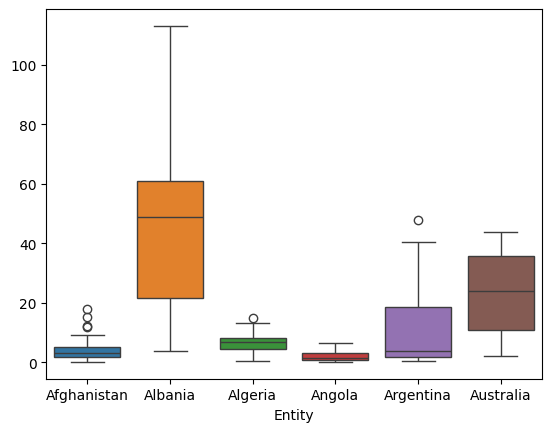

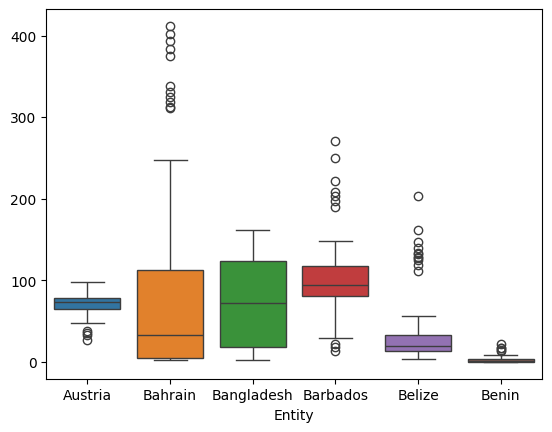

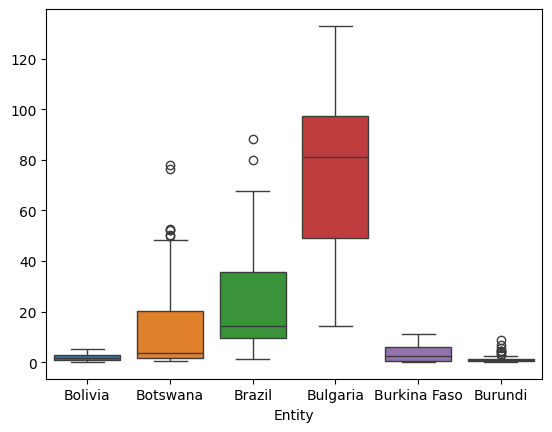

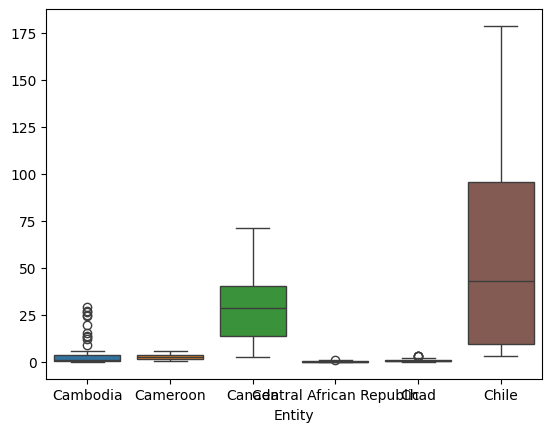

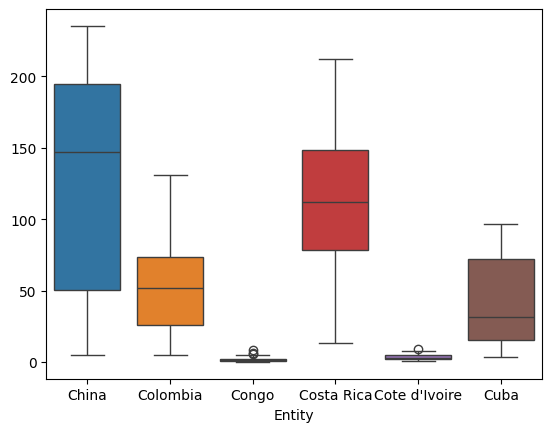

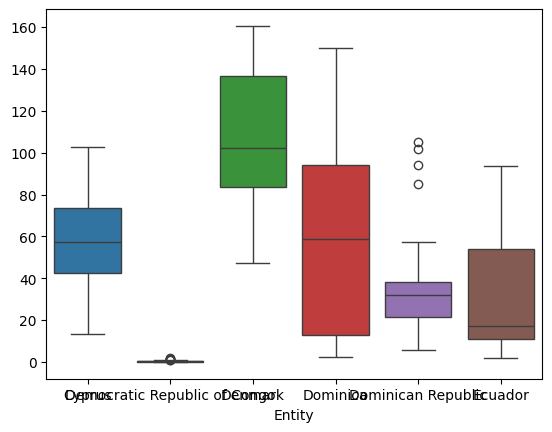

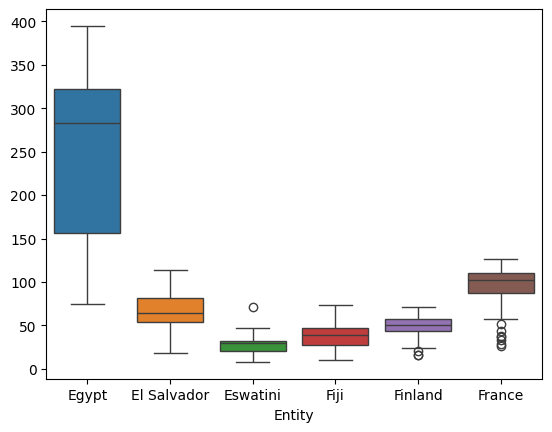

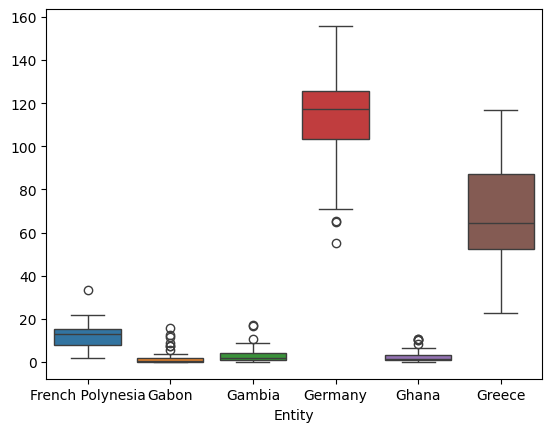

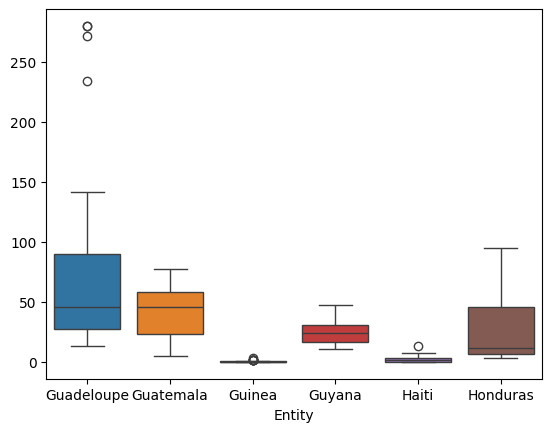

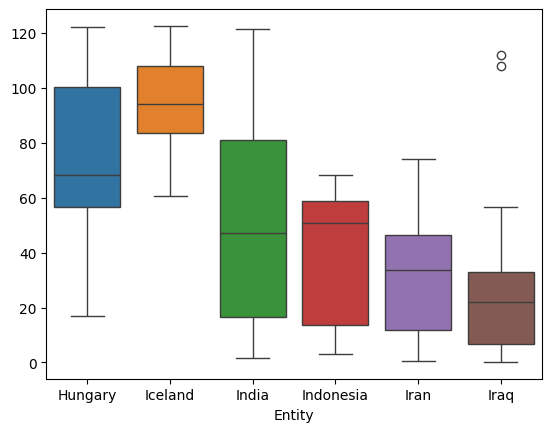

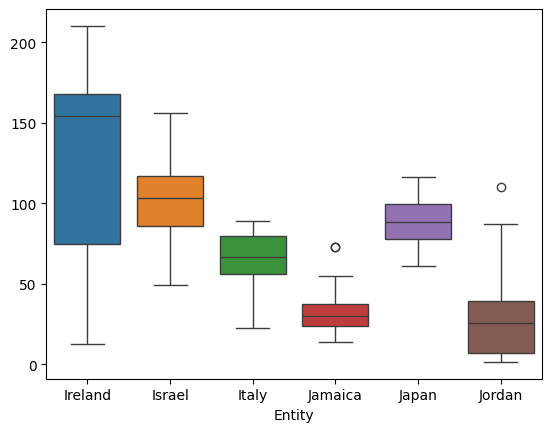

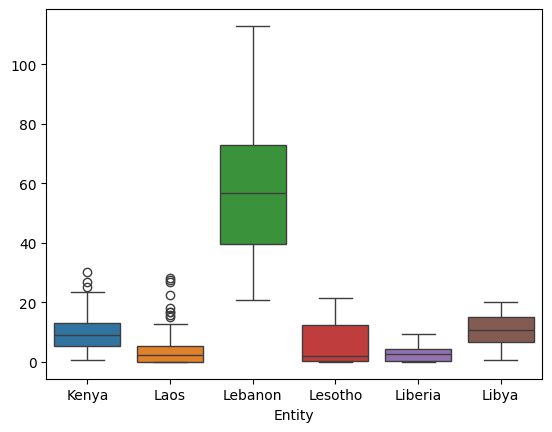

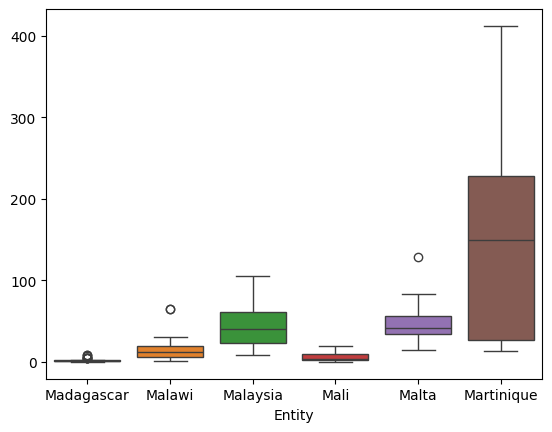

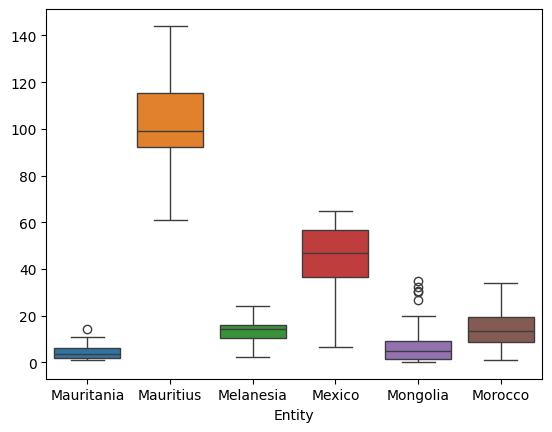

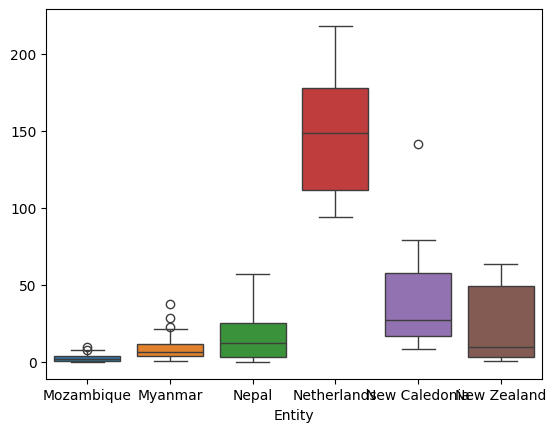

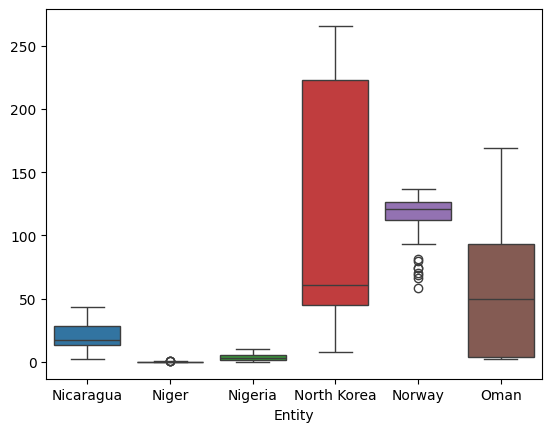

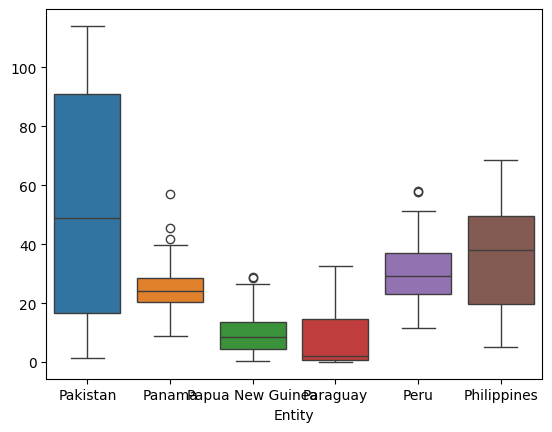

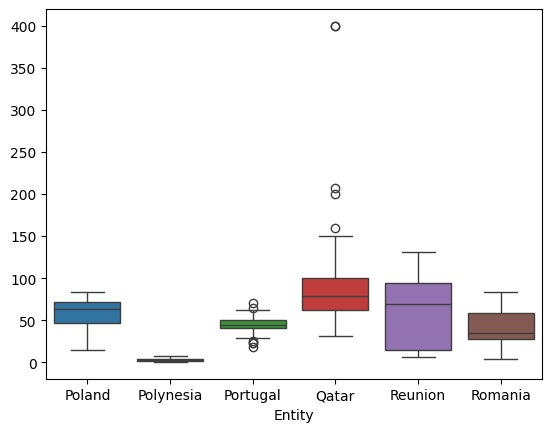

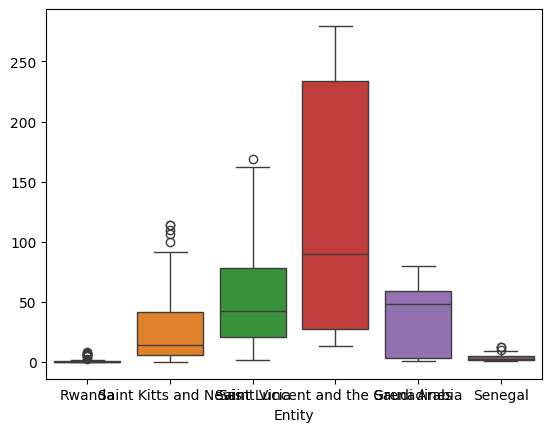

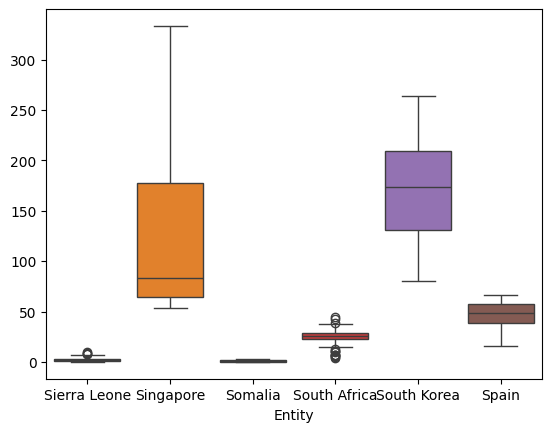

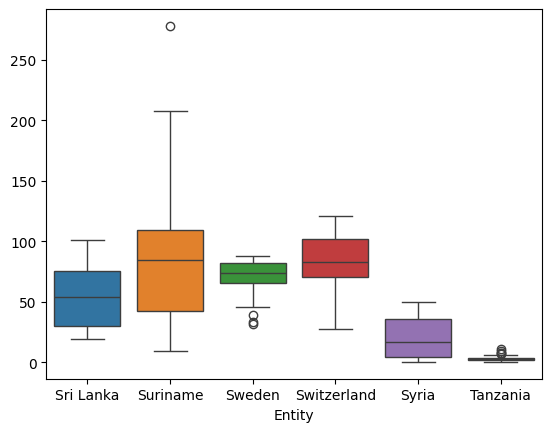

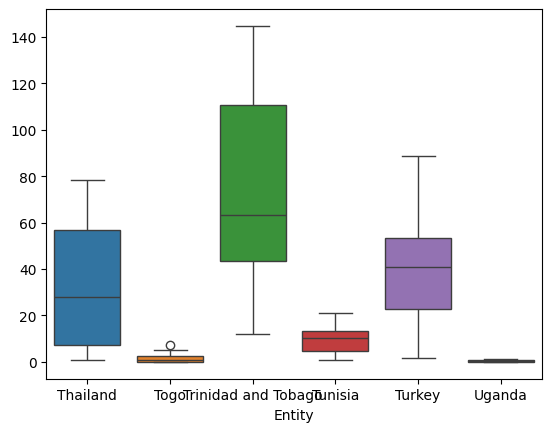

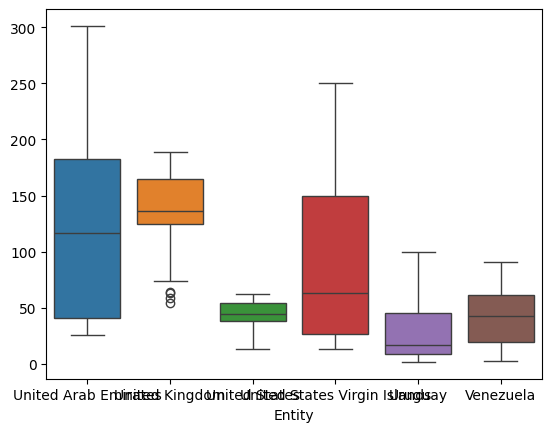

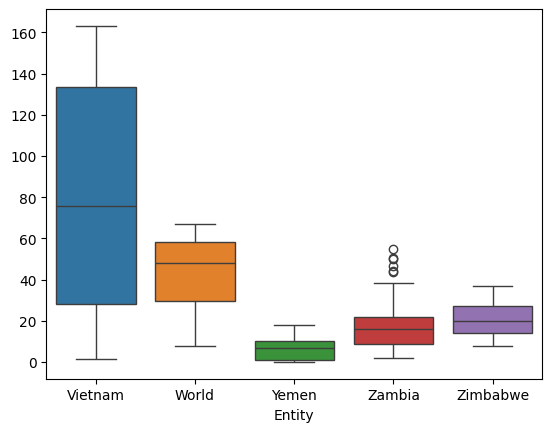

In [29]:
j=6
for i in range (0, len(fertilizer_pivot.columns), 6):
  plt.figure()
  sns.boxplot(data = fertilizer_pivot.iloc[:,i:j])
  plt.show()
  j=j+6

In [30]:
fertilizer_outliers = []
for col in fertilizer_pivot.columns:
  Q1 = np.percentile(fertilizer_pivot[col], 25, interpolation = 'midpoint')
  Q3 = np.percentile(fertilizer_pivot[col], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  lower = Q1 - (1.5 * IQR)
  upper = Q3 + (1.5 * IQR)
  if fertilizer_pivot[(fertilizer_pivot[col] < lower) | (fertilizer_pivot[col] > upper)].any(axis=None):
    fertilizer_outliers.append(col)
print(fertilizer_outliers)

['Afghanistan', 'Algeria', 'Argentina', 'Austria', 'Bahrain', 'Barbados', 'Belize', 'Benin', 'Botswana', 'Brazil', 'Burundi', 'Cambodia', 'Central African Republic', 'Chad', 'Congo', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Dominican Republic', 'Eswatini', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Germany', 'Ghana', 'Guadeloupe', 'Guinea', 'Haiti', 'Iraq', 'Jamaica', 'Jordan', 'Kenya', 'Laos', 'Madagascar', 'Malawi', 'Malta', 'Mauritania', 'Mongolia', 'Mozambique', 'Myanmar', 'New Caledonia', 'Niger', 'Norway', 'Panama', 'Papua New Guinea', 'Peru', 'Portugal', 'Qatar', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Senegal', 'Sierra Leone', 'South Africa', 'Suriname', 'Sweden', 'Tanzania', 'Togo', 'United Kingdom', 'Zambia']


In [31]:
for col in fertilizer_outliers:
  Q1 = np.percentile(fertilizer_pivot[col], 25, interpolation = 'midpoint')
  Q3 = np.percentile(fertilizer_pivot[col], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  lower = Q1 - (1.5 * IQR)
  upper = Q3 + (1.5 * IQR)
  fertilizer_pivot[col] = np.where(fertilizer_pivot[col] < lower, lower, fertilizer_pivot[col])
  fertilizer_pivot[col] = np.where(fertilizer_pivot[col] > upper, upper, fertilizer_pivot[col])

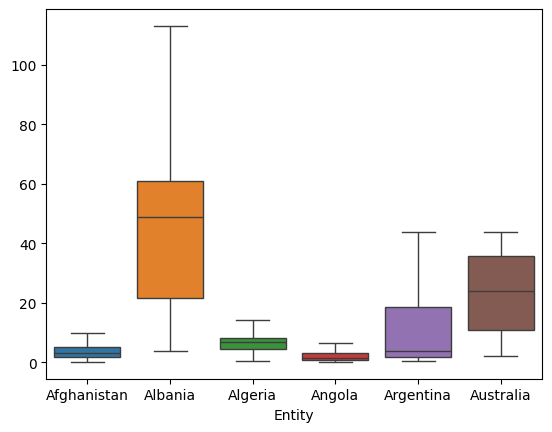

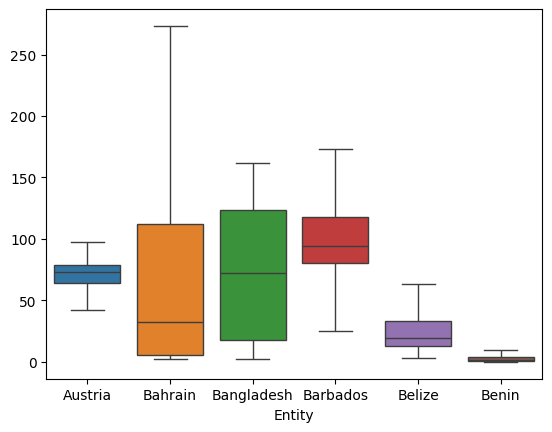

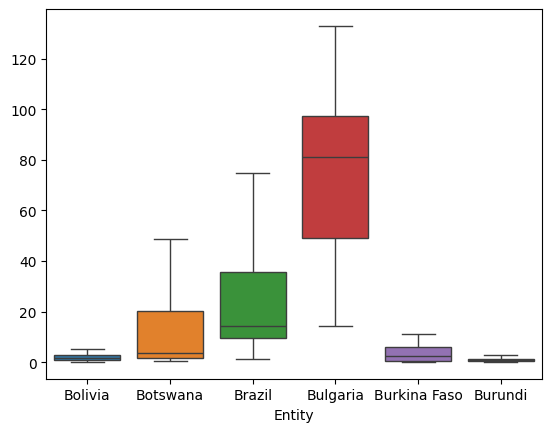

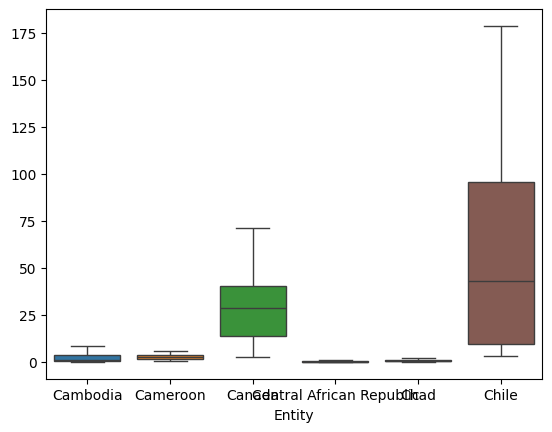

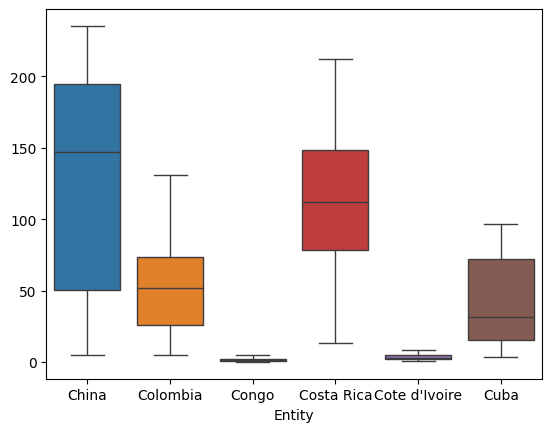

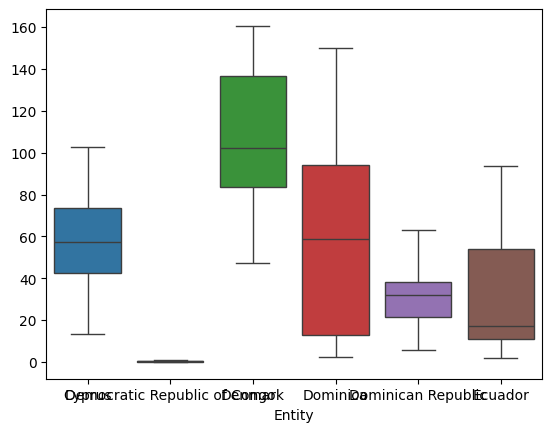

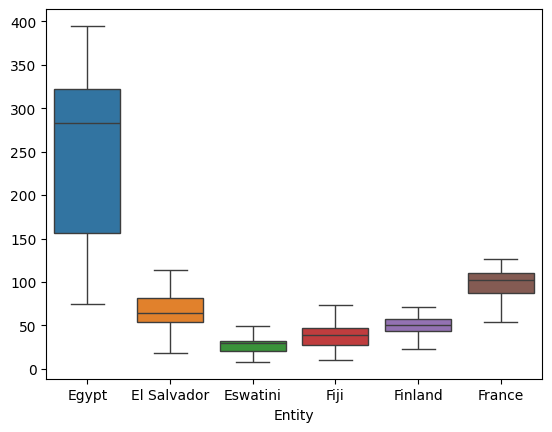

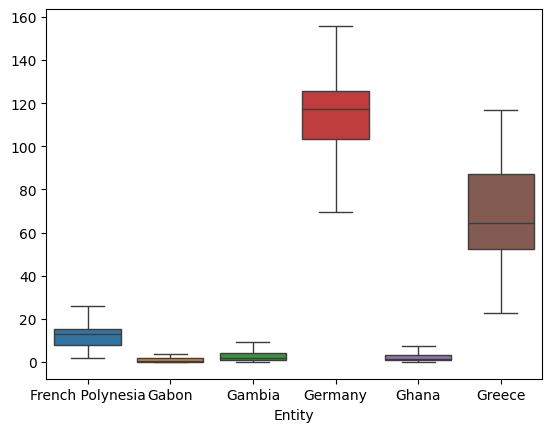

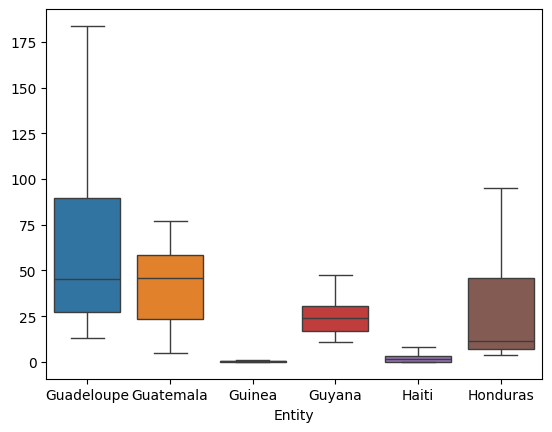

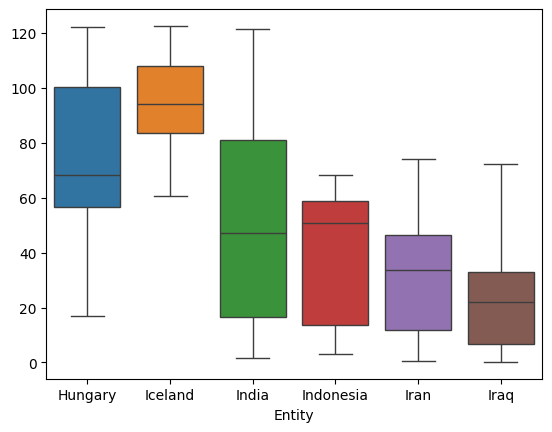

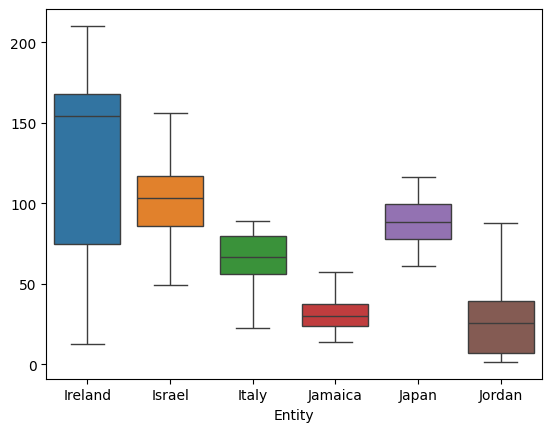

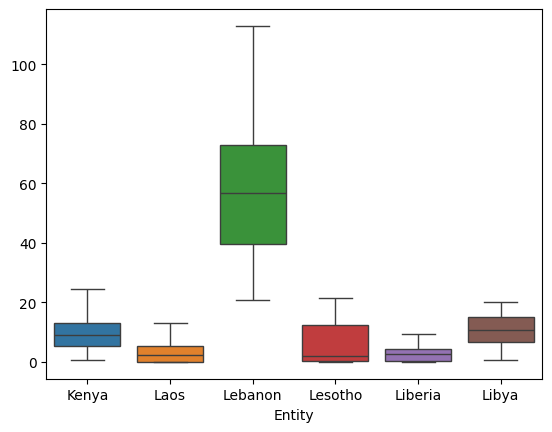

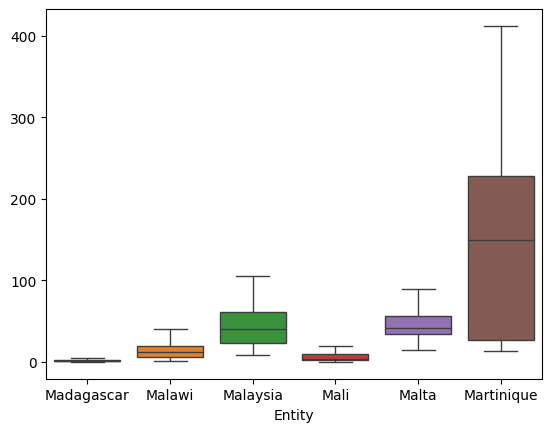

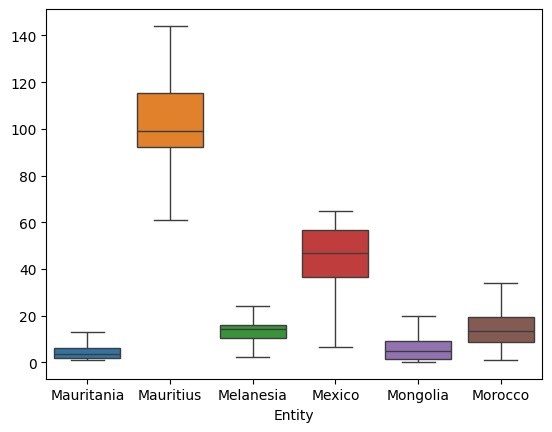

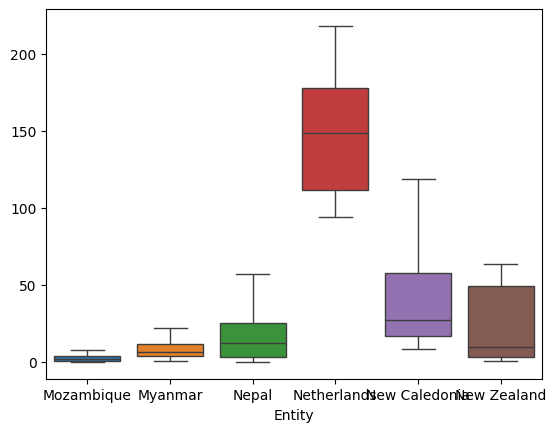

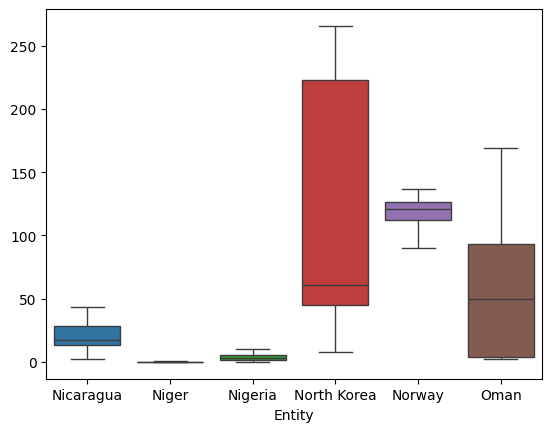

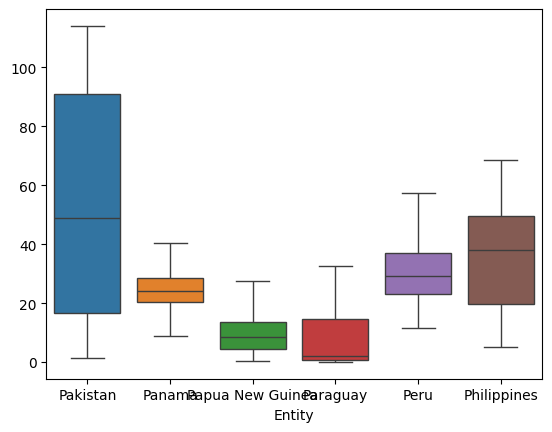

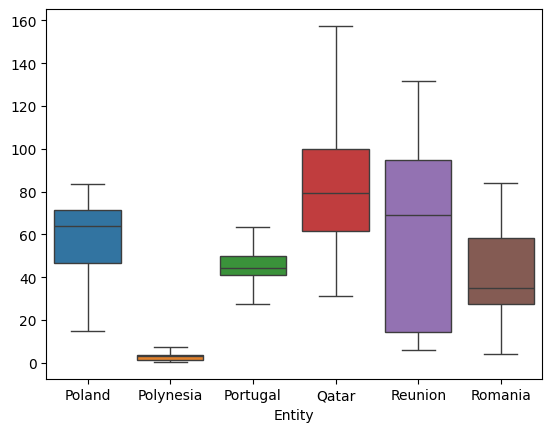

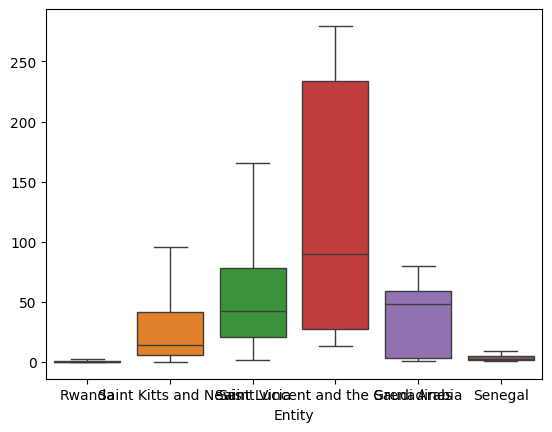

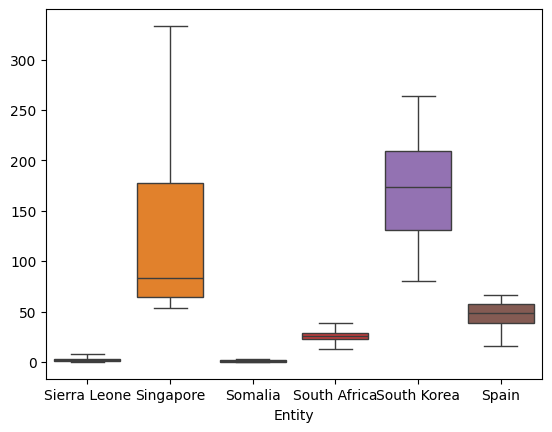

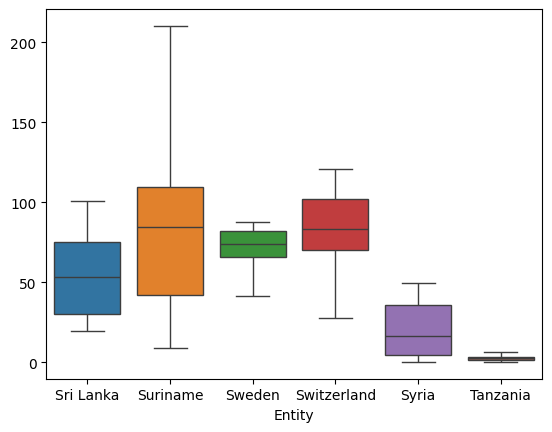

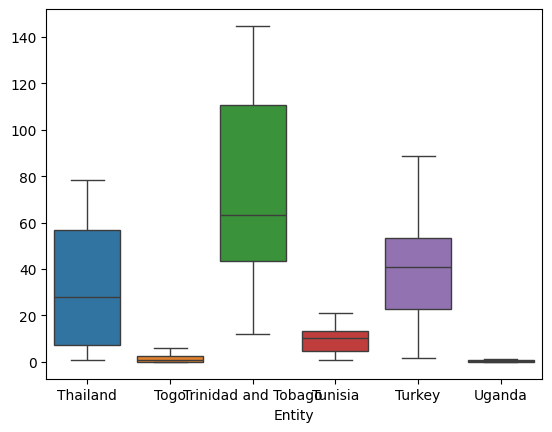

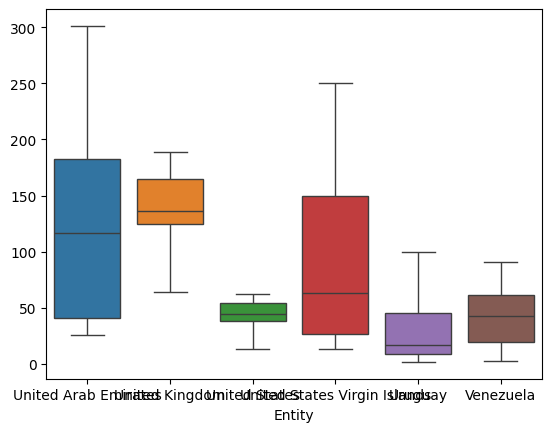

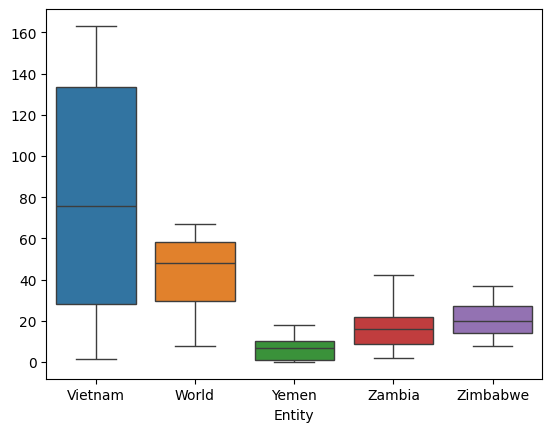

In [ ]:
j=6
for i in range (0, len(fertilizer_pivot.columns), 6):
  plt.figure()
  sns.boxplot(data = fertilizer_pivot.iloc[:,i:j])
  plt.show()
  j=j+6

In [ ]:
fertilizer_pivot = fertilizer_pivot.reset_index()


In [ ]:
fertilizer_processed = pd.melt(fertilizer_pivot, id_vars =['Year'], var_name='Country', value_name='Fertlizer_consumption')

In [ ]:
temperature_data = pd.read_csv('/content/drive/MyDrive/final project/average-monthly-surface-temperature.csv')

In [ ]:
print(temperature_data.head())

        Entity Code  year         Day  Average surface temperature  \
0  Afghanistan  AFG  1940  1940-01-15                    -2.032526   
1  Afghanistan  AFG  1940  1940-02-15                    -0.733487   
2  Afghanistan  AFG  1940  1940-03-15                     1.999130   
3  Afghanistan  AFG  1940  1940-04-15                    10.199746   
4  Afghanistan  AFG  1940  1940-05-15                    17.942122   

   Average surface temperature.1  
0                       11.32767  
1                       11.32767  
2                       11.32767  
3                       11.32767  
4                       11.32767  


In [ ]:
temperature_data = temperature_data.drop(columns=['Day', 'Average surface temperature'], axis=1)

In [ ]:
temperature_data = temperature_data.drop_duplicates(subset=['Entity','year'])

In [ ]:
print(temperature_data)

             Entity Code  year  Average surface temperature.1
0       Afghanistan  AFG  1940                      11.327670
12      Afghanistan  AFG  1941                      13.324721
24      Afghanistan  AFG  1942                      12.885410
36      Afghanistan  AFG  1943                      11.524734
48      Afghanistan  AFG  1944                      12.143650
...             ...  ...   ...                            ...
197482     Zimbabwe  ZWE  2020                      21.785597
197494     Zimbabwe  ZWE  2021                      21.573135
197506     Zimbabwe  ZWE  2022                      21.591951
197518     Zimbabwe  ZWE  2023                      22.349136
197530     Zimbabwe  ZWE  2024                      22.349136

[16575 rows x 4 columns]


In [ ]:
temperature_data = temperature_data.dropna(subset=['Code'])

In [ ]:
temperature_pivot = pd.pivot(temperature_data, index=['year'], columns=['Entity'], values=['Average surface temperature.1'])

In [ ]:
print(temperature_pivot)

       Average surface temperature.1                                       \
Entity                   Afghanistan    Albania    Algeria American Samoa   
year                                                                        
1940                       11.327670  10.647986  21.311056      26.434393   
1941                       13.324721  10.806905  22.005445      26.394377   
1942                       12.885410  11.375268  21.872087      26.069975   
1943                       11.524734  12.312192  21.083275      26.089449   
1944                       12.143650  11.373283  21.874914      26.464602   
...                              ...        ...        ...            ...   
2020                       12.358914  13.342273  24.726358      26.994550   
2021                       13.982883  13.125373  25.220282      26.756380   
2022                       13.753045  13.501858  24.677412      26.570168   
2023                       13.836345  13.822647  24.874125      27.005728   

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):print(temperature_pivot.isna().sum())

                               Entity                                      
Average surface temperature.1  Afghanistan                                     0
                               Albania                                         0
                               Algeria                                         0
                               American Samoa                                  0
                               Andorra                                         0
                               Angola                                          0
                               Anguilla                                        0
                               Antigua and Barbuda                             0
                               Argentina                                       0
                               Armenia                                         0
                               Australia                                       0
                               Au